In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Setting

A/B testing can be framed as a multi-armed bandit problem following an "explore-then-commit" (ETC) strategy. We randomly choose policies (explore) for a fixed period, and then we choose the best policy (exploit) for all time thereafter. ETC generally has a linear regret bound; exploration always yields linear regret growth, and so does exploitation if we do not successfully learn the optimal policy.

ETC may exhibit sublinear regret bounds for certain classes of bandit problems. Here we consider a 2-armed Gaussian bandit with unit variance and suboptimality gap $\Delta$. It can be shown that if we try each arm for $M \geq 1$ trials (explore $2M$ trials in total) followed by pure exploitation, the expected cumulative regret satisfies

$$\begin{align} E(R(n)) \leq M\Delta + n\Delta\exp\left(-\frac{M\Delta^2}{4}\right). \end{align}$$

The two terms show the fundamental tradeoff between exploration and exploitation. Given a finite time period, if $M$ is too large, then we explore for too long and regret is primarily due to the first term. If $M$ is too small, then the likelihood of committing to the suboptimal policy will grow, and regret is primarily due to the second term. 

# Part 1 [8 pts]

Suppose that we plan to run our bandit experiment for a total of $N$ trials, including both exploration and exploitation. This knowledge will allow us derive the "best" value for $M$ so as to minimize the upper bound on expected regret. 

* Show that the expected cumulative regret can be minimized by choosing 
$$\begin{align} M = \max\left(1, \left\lceil\frac{4}{\Delta^2}\log\left(\frac{N\Delta^2}{4}\right)\right\rceil\right). \end{align}$$
You may assume that, in rounding $M$ to the nearest integer, we prefer to make the second regret term smaller.

* Show that for the choice of $M$ above, $E(R(N))$ grows as $O(N)$ for small $N$ and $O(\log N)$ for sufficiently large $N$. 

For the expected cuumulative regret be minimized, we consider differentiate it with M. We take:
$$ E(R(n)) = M\Delta + N\Delta\exp\left(-\frac{M\Delta^2}{4}\right).$$
Differentiate it with respect to M, we get 
$$ \frac{\partial E(R(n))}{\partial M} = \Delta + N\Delta\exp\left(-\frac{M\Delta^2}{4}\right)\left(-\frac{\Delta^2}{4}\right).$$
Then we have 
$$ \Delta + N\Delta\exp\left(-\frac{M\Delta^2}{4}\right)\left(-\frac{\Delta^2}{4}\right) = 0.$$

$$ 1 + N\exp\left(-\frac{M\Delta^2}{4}\right)\left(-\frac{\Delta^2}{4}\right) = 0.$$

$$ N\exp\left(-\frac{M\Delta^2}{4}\right)\left(\frac{\Delta^2}{4}\right) = 1.$$

$$ \exp\left(-\frac{M\Delta^2}{4}\right) = \frac{4}{N\Delta^2}.$$

$$ \left(-\frac{M\Delta^2}{4}\right) = \log\frac{4}{N\Delta^2}.$$

$$ \left(\frac{M\Delta^2}{4}\right) = -\log\frac{4}{N\Delta^2} = \log\frac{N\Delta^2}{4}.$$

$$ M = \frac{4}{\Delta^2}\log\frac{N\Delta^2}{4}.$$

As we're given $M \geq 1$, we have 

$$\begin{align} M = \max\left(1, \left\lceil\frac{4}{\Delta^2}\log\left(\frac{N\Delta^2}{4}\right)\right\rceil\right). \end{align}$$

As desired.

For small N, $$\frac{4}{\Delta^2}\log\left(\frac{N\Delta^2}{4}\right) $$
can be pretty small or negative, as $$\log\left(\frac{N\Delta^2}{4}\right) $$ might be very small or negative. Thus, for small N, we say M is taking as 1, then we have 
$$ E(R(n)) = \Delta + N\Delta\exp\left(-\frac{\Delta^2}{4}\right) = \Delta(1+N\exp\left(-\frac{\Delta^2}{4}\right)) = O(N).$$

Thus we have 
$$ E(R(n)) = O(N).$$
or $E(R(N))$ grows as $O(N)$ for small $N$.

For sufficiently large N, however, say $$\frac{4}{\Delta^2}\log\left(\frac{N\Delta^2}{4}\right) $$ is larger than 1, M would take $$\frac{4}{\Delta^2}\log\left(\frac{N\Delta^2}{4}\right) $$
Thus we'll have 
$$ E(R(n)) = M\Delta + N\Delta\exp\left(-\frac{M\Delta^2}{4}\right)$$
$$ = \frac{4}{\Delta^2}\log\left(\frac{N\Delta^2}{4}\right)\Delta + N\Delta\exp\left(-\frac{\frac{4}{\Delta^2}\log\left(\frac{N\Delta^2}{4}\right)\Delta^2}{4}\right).$$
$$ = \frac{4}{\Delta}\log\left(\frac{N\Delta^2}{4}\right) + N\Delta\exp\left(-{\log\left(\frac{N\Delta^2}{4}\right)}\right).$$

While
$$\exp\left(-{\log\left(\frac{N\Delta^2}{4}\right)}\right) = \exp\left({\log\left(\frac{4}{N\Delta^2}\right)}\right) = \frac{4}{N\Delta^2}$$

Thus
$$ = \frac{4}{\Delta}\log\left(\frac{N\Delta^2}{4}\right) + N\Delta\frac{4}{N\Delta^2} = \frac{4}{\Delta}\log\left(\frac{N\Delta^2}{4}\right) + \frac{4}{\Delta}.$$

Thus we get
$$ E(R(n)) = \frac{4}{\Delta}(\log\left(\frac{N\Delta^2}{4}\right) + 1) = O(logN).$$
or $E(R(N))$ grows as $O(\log N)$ for sufficiently large $N$.

# Part 2 [8 pts]

Let's visualize the regret bound given in Equation (1) using the corresponding values of $M$ in Equation (2).  

* For each of the values $\Delta \in \{0.1, 0.2, 0.5, 1\}$, compute the regret bound of $E(R(N))$ for $N = 1, ..., 1000$. Overlay the four plots of $E(R(N))$ on the same figure and show a legend.

* Briefly explain your observations. For smaller values of $\Delta$ vs larger values:
    * Why is there a longer period of linear regret growth? 
    * Why is regret magnitude smaller in the short term? 
    * Why does regret grow faster in the long term?

In [23]:
delta = [0.1, 0.2, 0.5, 1]

In [24]:
# lecture version graph
def run_experiment(N, delta_here):
    plt.figure(figsize=(10,7))

    for d in delta_here:
        temp = (4/(d)**2) * (np.log((N * (d)**2) / 4))
        M = np.maximum(1, temp)
        expected = M * d + N * d * np.exp(-(M * (d)**2) / 4)
        plt.plot(N, expected, label="delta=%.2f"%d)

    plt.xscale('log', base=10)
    plt.title("delta")
    plt.legend()
    plt.tight_layout()
    plt.show()

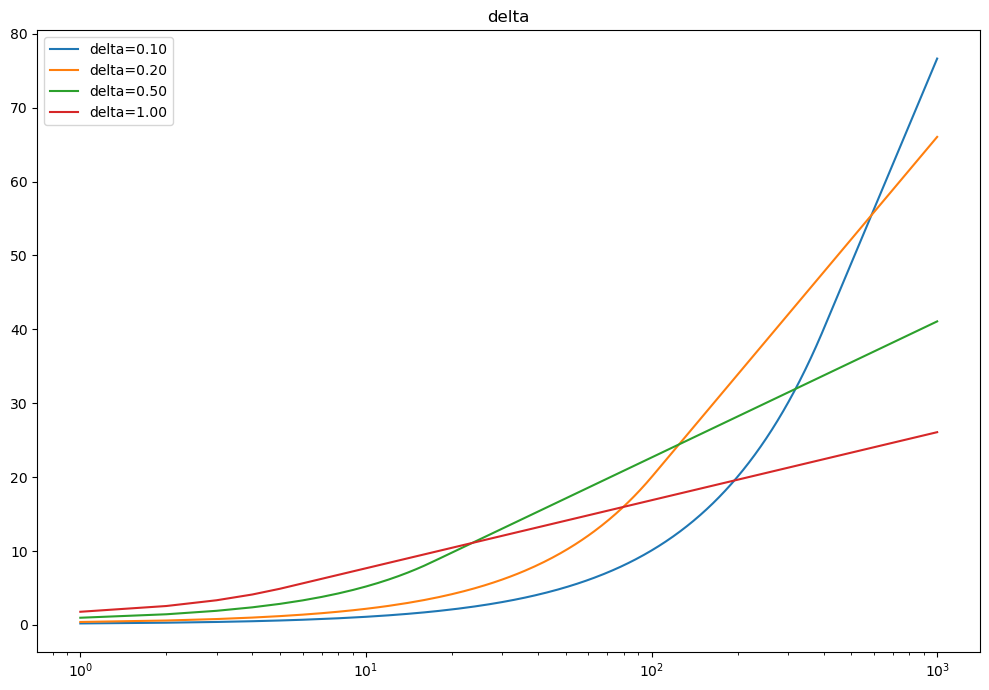

In [25]:
N = np.arange(1, 1001)
run_experiment(N, delta)

In [26]:
def run_experiment_n(N, delta_here):
    plt.figure(figsize=(10,7))

    for d in delta_here:
        temp = np.ceil((4/(d)**2) * (np.log((N * (d)**2) / 4)))
        M = np.maximum(1, temp)
        expected = M * d + N * d * np.exp(-(M * (d)**2) / 4)
        plt.plot(N, expected, label="delta=%.2f"%d)

    plt.title("delta")
    plt.legend()
    plt.tight_layout()
    plt.show()

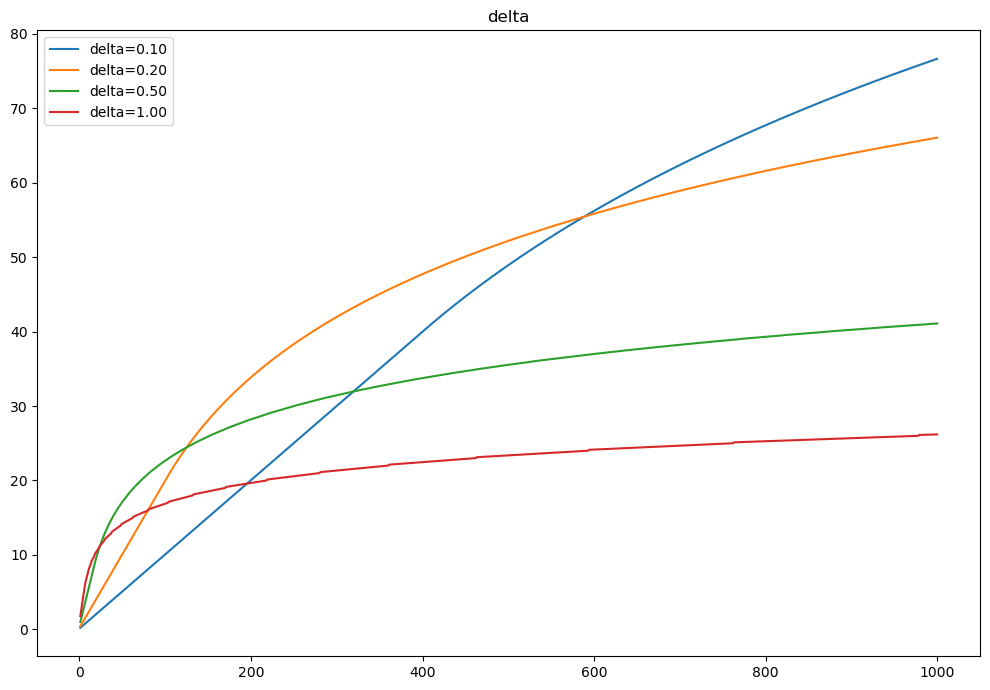

In [27]:
run_experiment_n(N, delta)

* Why is there a longer period of linear regret growth? 
We can observe, for smaller delta, the regret grows relatively linearly for longer period, probably because in this case the suboptimal gap is smaller (difference between optimal and suboptimal is smaller), so it's exploring for a longer time. While for larger delta. Thus for smaller value of $\Delta$, there tend to be a longer period of linear regret growth.

* Why is regret magnitude smaller in the short term? 
We observe regret magnitude smaller for smaller delta in the short term. We can tell the relationship of delta and expected regret from the formula, and as we analyze before, the regret magnitude seems to be proportional to the delta. Thus a smaller delta would tend to lead to smaller regret magnitude in the short term, as in this case based on the rule for M, smaller delta would have more influence to lead to a smaller regret magnitude, and smaller cum regret. Mainly, in short term, while delta has positive influence to the expected regret, we have smaller delta means would probably means that we have smaller regret magnitude as well in this case. 

* Why does regret grow faster in the long term? 
Because we see the while in long term, with smaller delta value, is might still exploring a lot while larger delta values might already turned to starting exploitation. Thus for larger delta, as we can see from the plot, they tend to grow slower, while for smaller delta it's still kind of similar as before, so in the long term the regret grow faster.

# Part 3 [8 pts]

Now let's implement ETC for empirical studies. We provide a `Gaussian_Bandit` class below.

* Implement `etc()`. Given $N$, the number of `trials`, the value of $M$ should be computed just once and remain constant throughout. ETC action selection can be implemented by choosing $A_n = n\%2$ for $n < 2M$ and $A_n = \argmax_a Q_n(a)$ otherwise.

* `etc()` should return the single empirical value of $R(N)$, the cumulative regret after $N$ timesteps.

In [28]:
class Gaussian_Bandit:
    def __init__(self, means, variances):
        self.means = means
        self.variances = variances
    def pull_arm(self, i):
        return np.random.normal(self.means[i], self.variances[i])

In [29]:
def etc(bandit, trials):
    optimal = bandit.means[0]
    delta = bandit.means[0] - bandit.means[1]
    temp = np.ceil((4/(delta)**2) * (np.log((trials * (delta)**2) / 4)))
    M = np.maximum(1, temp)
    K = len(bandit.means)
    regret = 0   # Instantaneous regret at each trial
    Q = np.zeros(K)         # Q-values
    N = np.zeros(K)         # Counts
    cumR = 0

    for n in range(trials):
        if n < 2 * M:
            A = n % 2
        else: 
            A = np.argmax(Q) 
        
        reward = bandit.pull_arm(A)
        N[A] += 1
        Q[A] += 1/N[A] * (reward - Q[A])

        regret = optimal - reward
        cumR += regret
    return cumR


# Part 4 [8 pts]

Now let's consider a Gaussian bandit with $\mu_1 = 0.5$ and $\mu_2 = 0$ (so $\Delta = 0.5$). 

* Run `etc()` for each value of $N$ ranging from 1 to 1000. For each $N$ value, perform 100 runs or simulations. You will thus call `etc()` 100k times.

* Compute and plot the values of $E(R(N))$, each averaged across the 100 simulations, against $N$.

* Compare this plot to the one you found in Part 2 above (specifically for $\Delta=0.5$). Does the theoretical upper bound appear accurate?


In [30]:
bandit = Gaussian_Bandit([0.5, 0], [1, 1])
N = np.arange(1, 1001)
simulation = 100
regret_list = []

for n in N:
    regret_sum = []
    for sim in range(simulation):
        regret = etc(bandit, n)
        regret_sum.append(regret)

    regret_here = np.mean(regret_sum)
    regret_list.append(regret_here)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

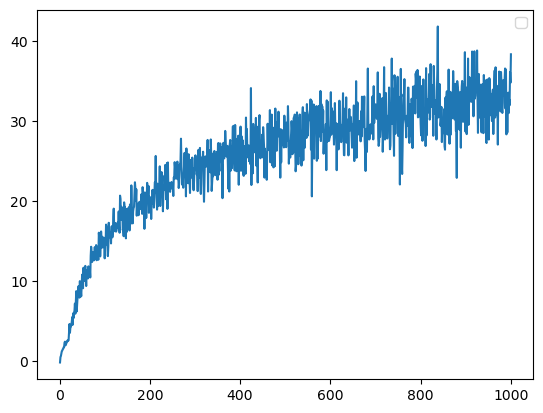

In [31]:
plt.plot(N, regret_list)
plt.legend()
plt.show

Yes, by comparing the plot we got here with the on with delta = 0.5 we got in part 2, we do see overall kind of similar trend and tend to have an upper bound around 40. The two plot is not exactly the same but overall pretty similar, we might want to say this theoretical upper bound appear somewhat accurate. 